In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.datasets import load_digits
digits=load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
plt.gray()

<Figure size 640x480 with 0 Axes>

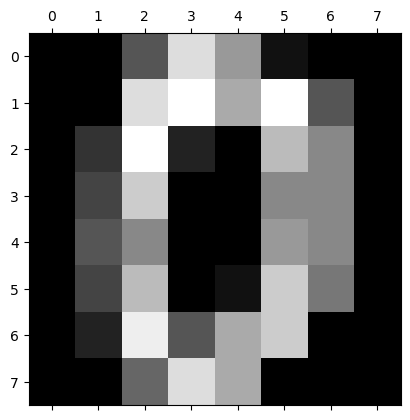

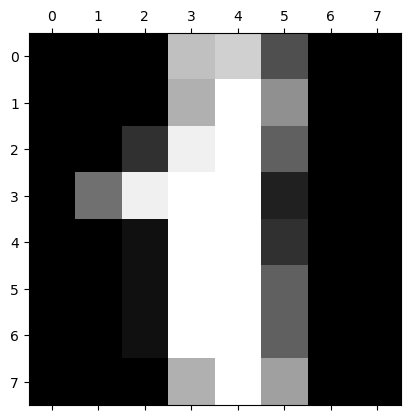

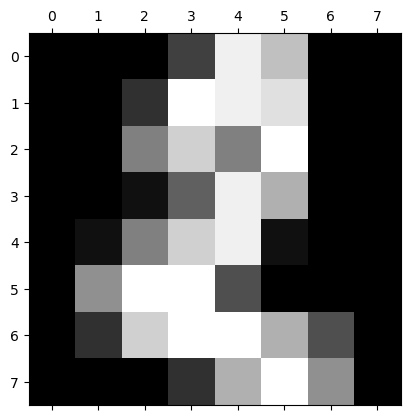

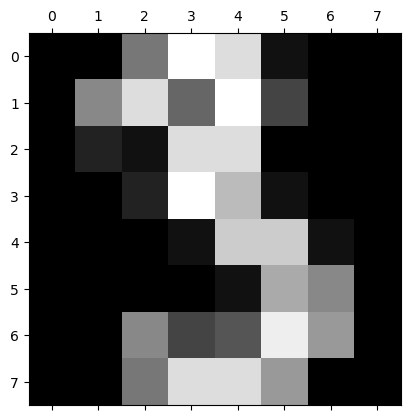

In [8]:
for i in range(4):
    plt.matshow(digits.images[i])

In [9]:
df=pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [10]:
df['target']=digits.target

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(df.drop(['target'], axis='columns'), digits.target, test_size=0.2)

In [13]:
len(x_test)

360

In [16]:
from sklearn.ensemble import RandomForestClassifier 
model=RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [17]:
model.score(x_test, y_test)

0.9805555555555555

In [21]:
y_pred=model.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 48,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 28,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 29,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  1, 35,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 32]], dtype=int64)

Text(95.72222222222221, 0.5, 'truth')

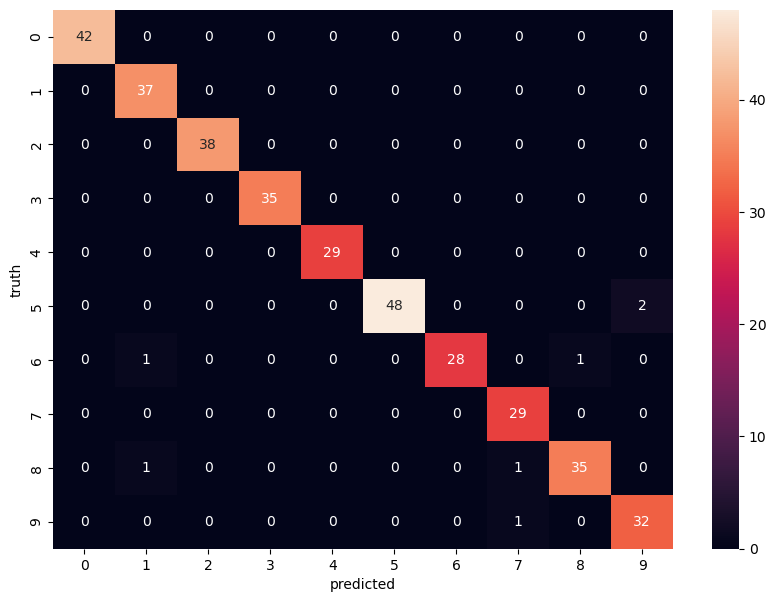

In [27]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')